 #                    <font color=blue> FLIGHT DELAY PREDICTION, 2015</font>
Pooja Ramesh
***

##**Introduction** 
Flight delays are a serious problem, which costs airlines, passengers, and U.S. economy. Flight delay occurs when an airline lands or takes off later than its scheduled arrival or departure time respectively.
<br>
<br>
##**Objective** 
###- To build a model to predict flight delays.
###- The model built should be convenient for the user/traveller to predict flight delay of their upcoming flights.
<br>

##**Literature Review** 
Many attempts have been made by researchers in the past for predicting flight delays using Machine Learning and Deep Learning.

##1. Review on Machine Learning Techniques: 
- Kalliguddi et al.[1] constructed regression models like Decision Tree Regressor, Random Forest Regressor and Multiple Linear Regressor on flight data for predicting both departure and arrival delays 
- Naul [2] applied Logistic Regression, Naive Bayes Classifier and Support Vector Machine on flight data for prediction of flight departure delay and also compared the performance between them.

##2. Review on Deep Learning Techniques: 
- Kim et al. [3] implemented a Deep Learning Approach using Recurrent Neural Networks (RNNs) for predicting flight delay. 
- Khanmohammadi et al. [4] proposed a Deep Learning Approach using Artifical Neural Network (ANN) and also introduced a new type of multilevel input layer ANN which is interpretable in the sense that the relationships between input and output variables can be easily chalked out and hence developing a flight delay prediction model for flights arriving or departing JFK Airport.
<br>
<br>

##**Data Source** 
The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics. A public dataset for year - 2015, available on [Kaggle](https://www.kaggle.com/usdot/flight-delays), has been used to perform analysis and build predictive models. 
<br><br>
***


#Data Analysis

##Importing required libraries to perform preliminary analysis of the data set

In [0]:
# Importing necessary libraries:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Visualization parameters:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid", {'axes.grid' : False})

## Importing necessary data to run analysis

The data from Kaggle has been stored in Google Cloud Platform. We read the CSV file onto a dataframe 'flights' to perform analysis.

In [0]:
flights = pd.read_csv('https://storage.googleapis.com/csc_pooja/flights.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## A quick check of the data

### - First 5 rows of the dataframe:

In [0]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### - Dimension of the dataframe:

In [0]:
flights.shape

(5819079, 31)

Kaggle dataset constitutes of approximately over 5 million observations with 31 features for the year 2015.

#Data Pre-processing

## 1. Rename columns to lowercase and replace space with '_'

We begin renaming our column names to lowercase to easily analyse our dataframe.

In [0]:
flights.columns = flights.columns.str.replace(' ','_')
flights.columns = map(str.lower, flights.columns)

##2. Feature selection

The model built should be convinient for the user/traveller to predict flight delay of their upcoming flights. Features will be selected based on this paradigm. <br>
It is an assumtpion that a user will have the below fight details at the time of booking:
1. month
2. day
3. day of week
4. airline
5. origin airport
6. destination airport
7. scheduled departure
8. scheduled arrival
9. distance
<br>

For model prediction, we will choose one of the below two as our target variable: 
1. arrival delay
2. departure delay



In [0]:
# Choosing the above features into a new dataframe 'flights_1':
flights_1 = flights [['year','month','day','day_of_week', 'airline',	'origin_airport',	'destination_airport',	'scheduled_departure', 'scheduled_arrival', 'distance',	'departure_delay', 'arrival_delay']]

###****Feature selection between arrival and departure delay.**** 

As part of feature selection process, we begin understanding correlation between features and evaluating their respective p-values. 

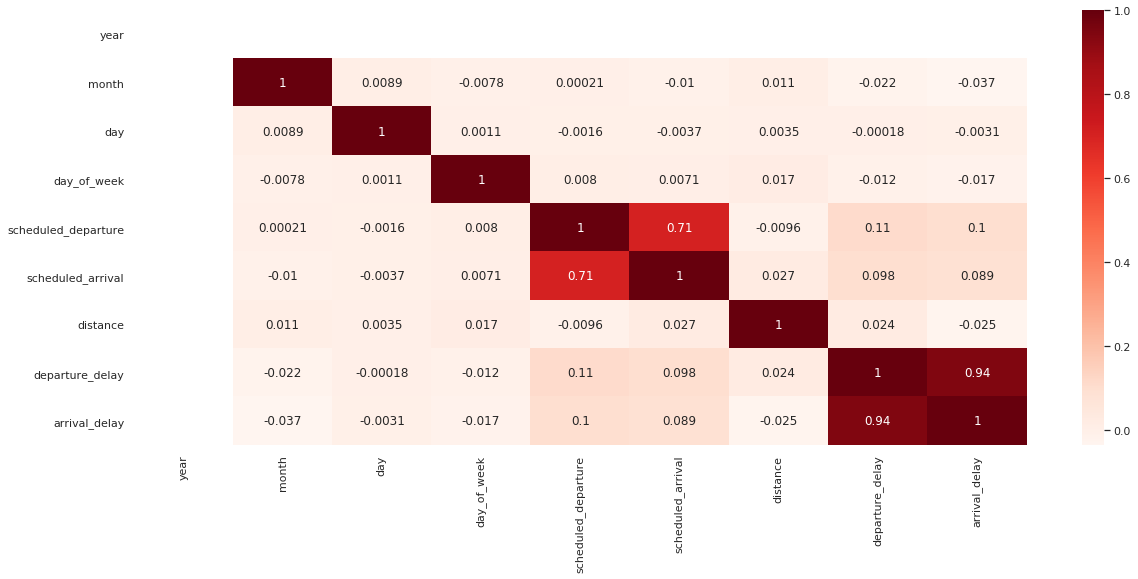

In [0]:
#Using Pearson Correlation
cor = flights_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We notice high correlation between departure-delay and arrival-delay. It is an assumtion that arrival delay is due to departure delay. Subsequently, we selected 'departure delay' as our target variable.

In [0]:
# Dropping arrival delay as we select departure delay are our target variable:
flights_1.drop(['arrival_delay'], axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 3. Handling data-types and missing values 

### - Understanding data-types of features:

In [0]:
#Data-type of features:
flights_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 11 columns):
year                   int64
month                  int64
day                    int64
day_of_week            int64
airline                object
origin_airport         object
destination_airport    object
scheduled_departure    int64
scheduled_arrival      int64
distance               int64
departure_delay        float64
dtypes: float64(1), int64(7), object(3)
memory usage: 488.4+ MB


###- Count of missing values in each column:

In [0]:
#count of missing values in each column:
missing_df = flights_1.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_1.shape[0]-missing_df['missing values'])/flights_1.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,departure_delay,86153,98.519474
1,year,0,100.000000
2,month,0,100.000000
3,day,0,100.000000
4,day_of_week,0,100.000000
5,airline,0,100.000000
6,origin_airport,0,100.000000
7,destination_airport,0,100.000000
8,scheduled_departure,0,100.000000
9,scheduled_arrival,0,100.000000


Only column 'departure-delay' had missing values.
We noticed that over 98% the data was available. We decided to drop all rows containing missing values.

In [0]:
#Removing rows with nan values
flights_1.dropna(axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##4. Replacing airline abbreviations to full name

We noticed that only abbreviations were available for each airlines. A supplementary dataset containing full names of each airlines was concatenated with original 'flights' dataset to add more meaning to column 'airline'. 
<br>
Additonal information regarding airlines can be found in dataset airlines.csv (Kaggle).


In [0]:
# Reading CSV file onto a dataframe 'airlines':
airlines = pd.read_csv('http://files.mobibootcamp.com/airlines.csv')

#Renaming column names to lowercase
airlines.columns = map(str.lower, airlines.columns)

In [0]:
# Adding abbreviations and full names of airline companies to dictionary:
abbr_companies = airlines.set_index('iata_code')['airline'].to_dict()

In [0]:
# Replacing airline abbreviations to full name in flight database:
flights_1['airline'] = flights_1['airline'].replace(abbr_companies)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##5. Creating a new feature - 'holiday' to check if a particular travel date is a holiday

It is an assumtion that airlines are probably going to be under stress near holidays. Holiday feature could probably be a decent predictor of a late flight. We created a new feature 'holiday' to analyse if a particular travel date was a holiday and understand the pattern of flight delays.
<br><br>
According to [calendarpedia](http://www.calendarpedia.com/holidays/federal-holidays-2015.html), ten major holidays include the below:

January 1, 2015	New Year's Day	
January 19, 2015	Martin Luther King Day	
February 16, 2015	Presidents' Day	
May 25, 2015	Memorial Day	
July 4, 2015	Independence Day	
September 7, 2015	Labor Day	
October 12, 2015	Columbus Day	
November 11, 2015	Veterans Day	
November 26, 2015	Thanksgiving Day	
December 25, 2015	Christmas Day	


In [0]:
# Creating date from year, month and day columns:
flights_1['date'] = pd.to_datetime(flights_1[['year', 'month', 'day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Creating a column to ascertain whether a date is holiday or not:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2015-01-01', end='2015-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

flights_1['holiday'] = flights_1['date'].isin(holidays)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Exploratory Data Analysis

To understand the relationship about predictors and response variable, exploratory data analysis is performed.

## 1. Number of flights in 2015 - Quarterly analysis

We begin segmenting our monthly flights data into quarters.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


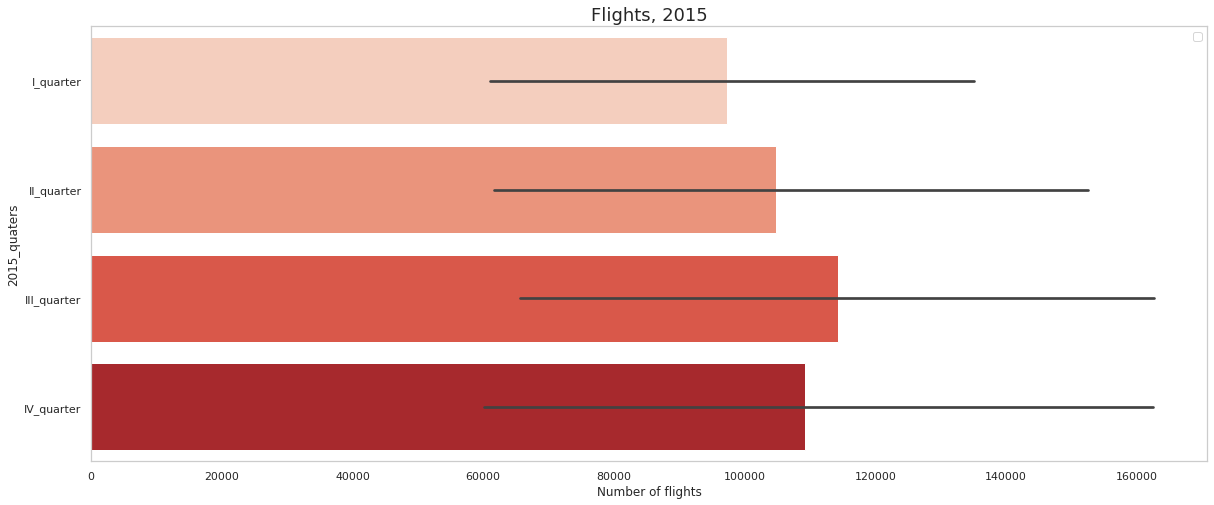

In [0]:
# Creating segments to discretize monthly data into quarterly data:
flights_1['2015_quaters'] = flights_1['month'].map({1: 'I_quarter', 2: 'I_quarter', 3: 'I_quarter',
                                                    4: 'II_quarter', 5: 'II_quarter', 6: 'II_quarter',
                                                    7: 'III_quarter', 8: 'III_quarter', 9: 'III_quarter',
                                                    10: 'IV_quarter', 11: 'IV_quarter', 12: 'IV_quarter'})

quarter = pd.DataFrame(flights_1.groupby(['airline', '2015_quaters'])['airline'].count()).rename(columns = {'airline': "count"}).sort_values(by='count',ascending=True).reset_index()

# Plotting the graph:
sns.barplot(y='2015_quaters', x= 'count', data=quarter, palette='Reds')
plt.title("Flights, 2015",fontsize=18) 
plt.xlabel('Number of flights')
plt.legend(loc='upper right')

We notice that many flights have travelled between July and September in the year - 2015.

## 2. Flights vs travel time

Assuming 'distance' is in minutes, we further analyse the travel time vs each airline. Travel time is discretized into the following:

Regional - < 60 
<br>
Short Haul - > 60  - < 240 
<br>
Medium Haul - > 240 - < 420  
Long Haul - > 420 - < 900 
<br>
Ultra Long Haul - > 900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


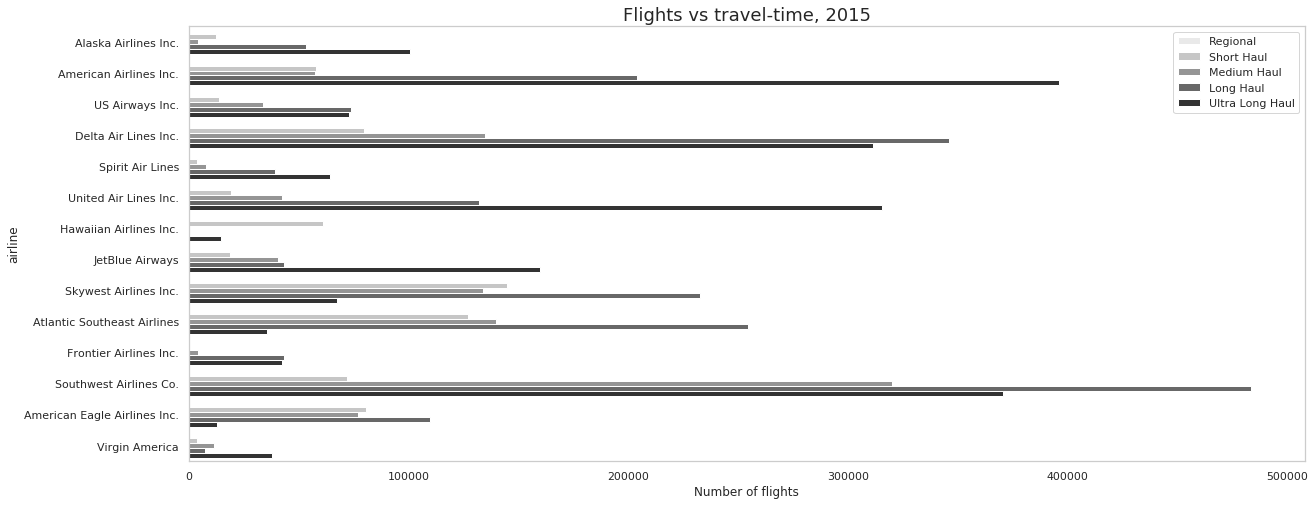

In [0]:
# Creating segments to discretize our distance data:
segments = [0, 60, 240, 420, 900, 5000, pd.np.inf]
labels = ['Regional', 'Short Haul', 'Medium Haul', 'Long Haul', 'Ultra Long Haul']

flights_1['haul'] = pd.cut(x=flights_1['distance'], bins=[0, 60, 240, 420, 900, 5000], labels=labels)

# Plotting the graph:
sns.countplot(y='airline',hue="haul", data=flights_1, palette="Greys")
plt.title("Flights vs travel-time, 2015",fontsize=18) 
plt.xlabel('Number of flights')
plt.legend(loc='upper right')

In comparison to other airlines, American Eagle Airlines has the least number of flights with ultra long haul and American Airlines has the highest number of long-haul flights.

## 3. Flights vs departure-delay in minutes, 2015


The Federal Aviation Administration ([FAA](https://en.wikipedia.org/wiki/Federal_Aviation_Administration))  considers a flight to be delayed when it is 15 minutes later than its scheduled time. Assuming 'departure_delay' is in minutes, the delays have been discretized as below:
<br>
No delay - < 15 
<br>
Short delay - > 15  - < 60 
<br>
Medium delay - > 60 - < 120  
Long delay - > 120



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Number of flights')

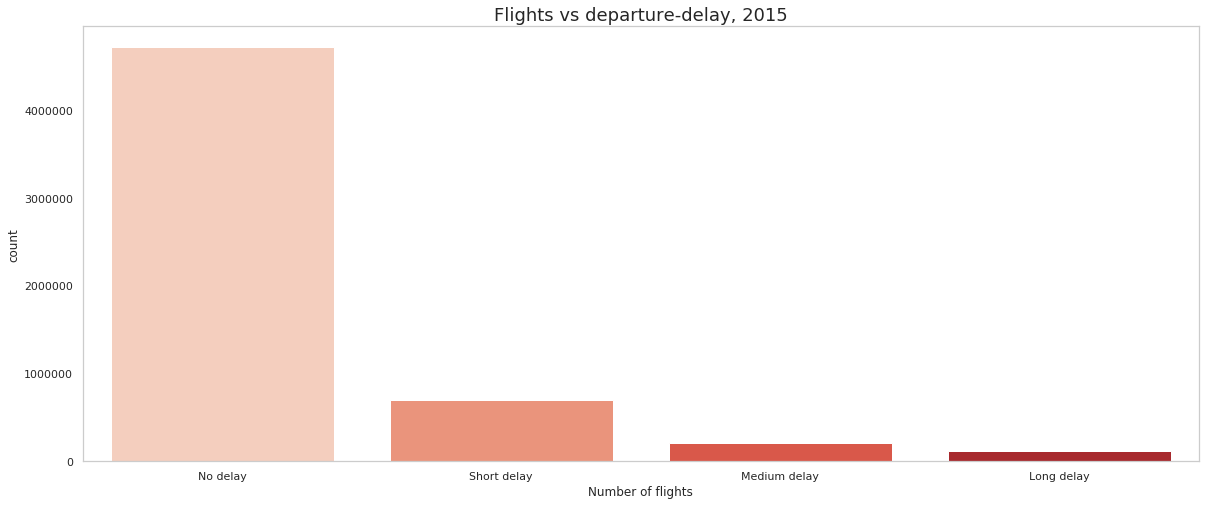

In [0]:
# Creating segments to discretize duration of departure delay:
segments = [-30, 15, 60, 120, 2000, pd.np.inf]
labels = ['No delay', 'Short delay', 'Medium delay', 'Long delay']

flights_1['delay'] = pd.cut(x=flights_1['departure_delay'], bins=[-30, 15, 60, 120, 2000], labels=labels)

# Plotting the graph:
sns.countplot(x='delay', data=flights_1, palette="Reds")
plt.title("Flights vs departure-delay, 2015",fontsize=18) 
plt.xlabel('Number of flights')

We noticed that majority of the flights have had no delays in 2015. However, short duration delays are more in comparison to long duration delays.

## 4. Airline-delay in departure

### - Summary statistics: 

In [0]:
# Defining function to extract statistical information:
def get_stats(group):
    return {'count': group.count(), 'mean': group.mean(), 'min': group.min(), 'max': group.max()}

# A dataframe with statistical information of each airline-delay in departure:
stats = flights_1['departure_delay'].groupby(flights_1['airline']).apply(get_stats).unstack()
stats = stats.sort_values('count')
stats

,count,mean,min,max
airline,,,,
Virgin America,61385.0,9.022595,-24.0,644.0
Hawaiian Airlines Inc.,76119.0,0.485713,-27.0,1433.0
Frontier Airlines Inc.,90290.0,13.350858,-46.0,1112.0
Spirit Air Lines,115454.0,15.944766,-37.0,836.0
Alaska Airlines Inc.,171910.0,1.785801,-82.0,963.0
US Airways Inc.,194825.0,6.141137,-35.0,759.0
JetBlue Airways,262843.0,11.514353,-31.0,1006.0
American Eagle Airlines Inc.,280282.0,10.125188,-36.0,1544.0
United Air Lines Inc.,509534.0,14.435441,-40.0,1314.0


### - Departure delay vs airline:

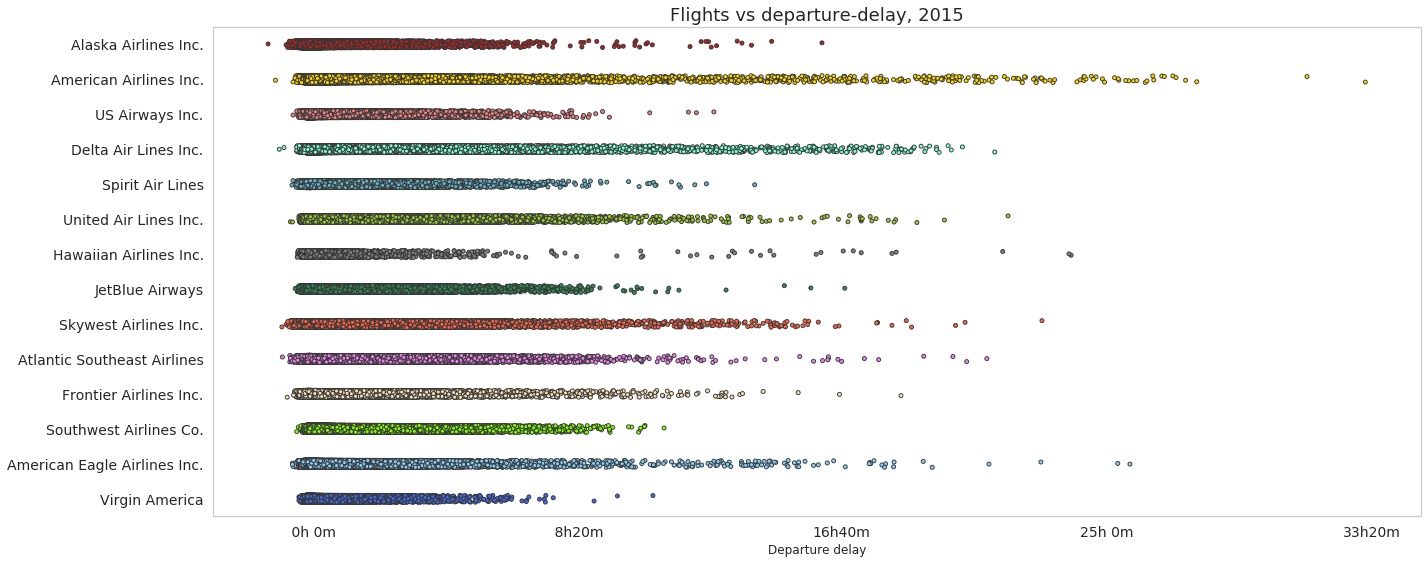

In [0]:
#Creating a subset of a dataframe:
flights_delay = flights_1.loc[:, ['airline', 'departure_delay']]

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

#Plotting the graph:
delay = sns.stripplot(y="airline", x="departure_delay", size = 4, palette = colors,
                    data=flights_delay, linewidth = 0.9,  jitter=True)
plt.setp(delay.get_xticklabels(), fontsize=14)
plt.setp(delay.get_yticklabels(), fontsize=14)
delay.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in delay.get_xticks()])
plt.xlabel('Departure delay')
plt.title("Flights vs departure-delay, 2015",fontsize=18) 
delay.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 

We noticed that American Airlines Inc. has had the longest delay in departure in 2015.

## 5. Analysing if holidays had more airline departure delays

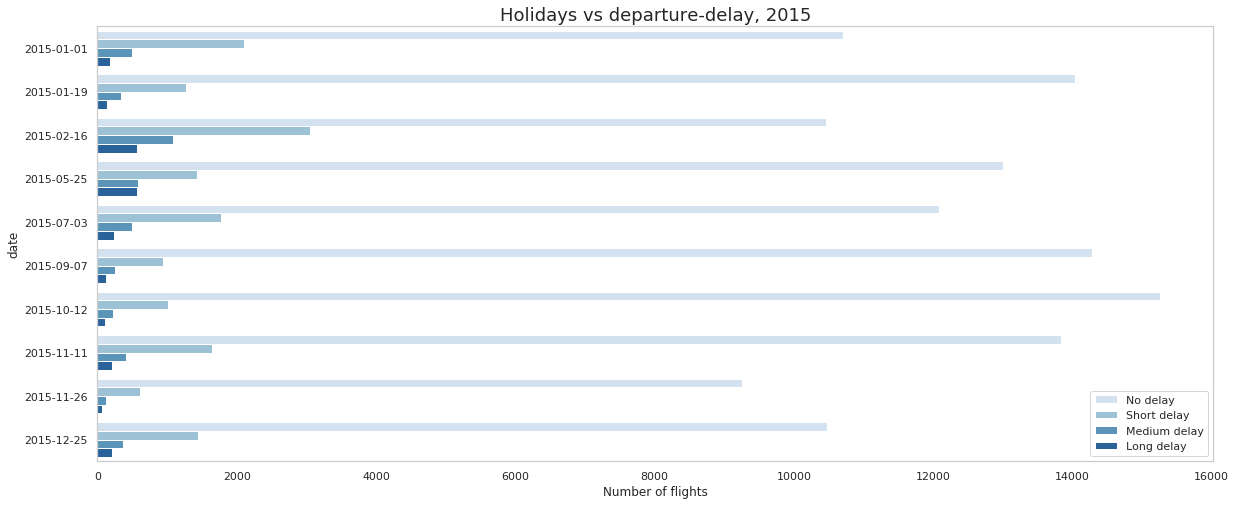

In [0]:
#Creating a new dataframe with subset of original dadaset:
holiday_1 = flights_1[['date','delay','holiday']]

#Filtering data with holidays == True:
a = [True]
holiday_1 = holiday_1[holiday_1.holiday.isin(a)]
holiday_1["date"] = pd.to_datetime(holiday_1["date"]).dt.date

# Plotting the graph:
sns.countplot(y='date', hue='delay', data=holiday_1, palette="Blues")
plt.title("Holidays vs departure-delay, 2015",fontsize=18) 
plt.xlabel('Number of flights')
plt.legend(loc='lower right')

Although we anticipated more delays during the holidays, the above graph illustrates that majority of the flights had no delays. For those flights which had a delay, many flights had a short delays (less than one hour). Presidents' Day (2015-02-16) and Memorial Day (2015-05-25) have had the longest flight delay in 2015 in comparison to other long flights delay. Overall, holidays may not have a predictive power flight delay prediction.

##6. Departure delay vs travel distance

We analyse if air-travel distance impacts departure delay.

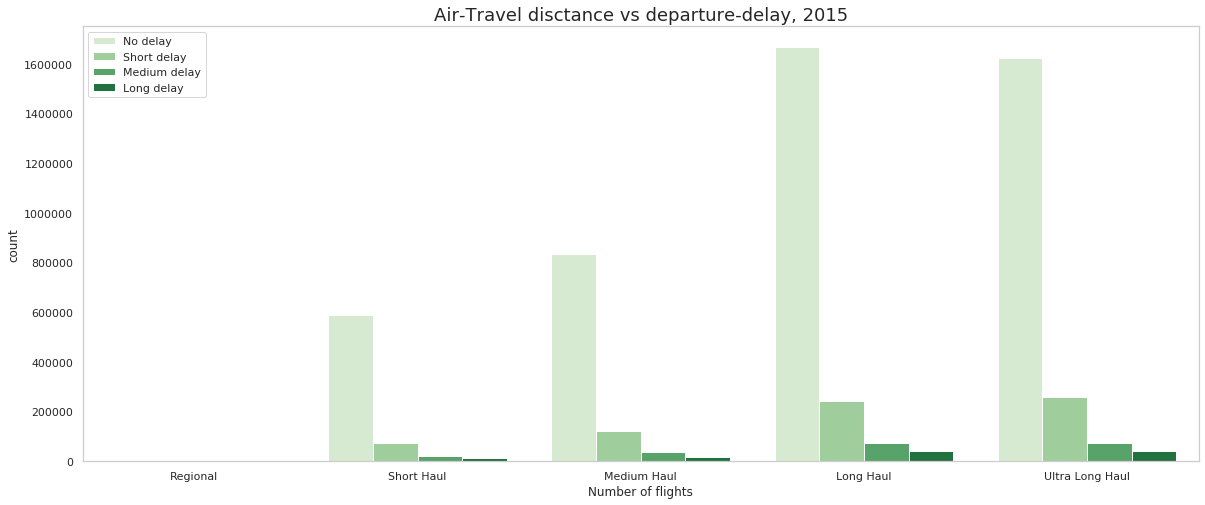

In [0]:
#Creating a new dataframe with subset of original dadaset:
travel = flights_1[['haul','delay']]

# Plotting the graph:
sns.countplot(x='haul', hue='delay', data=travel, palette="Greens")
plt.title("Air-Travel disctance vs departure-delay, 2015",fontsize=18) 
plt.xlabel('Number of flights')
plt.legend(loc='upper left')

We anticipated delays to have some correlations between air-travel distance. Majority of the flights with medium to ultra long air-travel have had no delays. For flights with delays, majority of the flights travel duration has been over 15 hours. Overall, Distance may not have a predictive power flight delay prediction.

# Model to predict airline delay
Using a tree-based method would be computationally infeasible as our dataset is large. We also need sparse matrices for our features after one-hot encoding. Hence we have used a supervised machine learning technique called **'Regression'** to predict delayed flights, that scales more easily and is better suited for online learning: ridge regression.

Lets build a regression model to predict how late a flight is going to be.



##Under-sampling our dataset-
Before we start to build a model, lets analyse some facts from our exploratory data analysis performed earlier. We noticed that majority of the flights in 2015 had no delays. Incase we build a model on an unbalanced data, we may have model with poor performance.

To balance our dataset, lets subset our dataset to include equal number of delays and no-delay observations.

In [0]:
# Creating a copy of our dataset to include only no-delay observations:
no_delay = flights_1.copy()
d=['No delay']
no_delay = no_delay[no_delay['delay'].isin(d)]

In [0]:
# Creating a copy of our dataset to include only delay observations:
delay_1 = flights_1.copy()
delay_1 = delay_1[delay_1.delay !='No delay']

In [0]:
# Size of delay observations:
delay_1.shape

(1018558, 16)

In [0]:
# Randomly selecting 1,018,558 observations from no_delay dataset to match delay observations
no_delay_random = no_delay.sample(n=1018558)

In [0]:
# Concatenate the sampled no_delay obervations with delay observations:
flights_predict = pd.concat([no_delay_random,delay_1], axis=0)

##1. Split dataset into numerical and categorical datasets

We begin preprocessing our data to have one-hot encoding of categorical features and feature scaling of numerical features. 
Separating our features into categorical/numerical categories to make processing simpler.

In [0]:
# Numerical features
scalingDF = flights_predict[['distance', 'holiday']].astype('float') 

# Categorical features
categDF = flights_predict[['month', 'day', 'day_of_week','origin_airport', 
                    'destination_airport', 'scheduled_arrival', 'scheduled_departure', 
                    'airline']].astype('str') 

##2. X_Final array:

One hot encoding for the categorical and numerical variables.

In [0]:
# One hot encoding for the categorical variables:
from sklearn.preprocessing import OneHotEncoder

# Create encoder object    
encoder = OneHotEncoder() 
categDF_encoded = encoder.fit_transform(categDF) 

In [0]:
# One hot encoding for the numerical variables:
from scipy import sparse 
scalingDF_sparse = sparse.csr_matrix(scalingDF)

Combining our features together to create feature matrix:

In [0]:
# Concatenation of numerical and categorical variables:
x_final = sparse.hstack((scalingDF_sparse, categDF_encoded))

##3. Y_Final array:

In [0]:
#Convert float to int64
flights_predict['departure_delay'] = flights_predict['departure_delay'].astype(int)

# Target values:
y_final = flights_predict['departure_delay'].values

## 4. Splitting into train and test sets

We break our data set into training and test sets to evaluate the performance of our models with unseen data.

In [0]:
from sklearn.model_selection import train_test_split

# Doing 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x_final,y_final,test_size = 0.2,random_state = 0) 

## 5. Scaling the numerical features

Converting our train/test data to a dense array.

In [0]:
x_train_numerical = x_train[:, 0:2].toarray() 
x_test_numerical = x_test[:, 0:2].toarray()

Scaling and converting our numerical data back to sparse.

In [0]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() 
scaler.fit(x_train_numerical) 
x_train_numerical = sparse.csr_matrix(scaler.transform(x_train_numerical)) 
x_test_numerical = sparse.csr_matrix(scaler.transform(x_test_numerical))

Replacing the first two columns of our x_train/test sets with the new scaled values.

In [0]:
x_train[:, 0:2] = x_train_numerical
x_test[:, 0:2] = x_test_numerical

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


## 6. Training the model

Scikit-learn has a model - SGD (or Stochastic Gradient Descent) regressor that can accept sparse matrices and is recommended for greater than 10,000 training examples.

The model has an algorithm that updates the weights of a ridge regression model by inputting one training example at a time instead of all of them in a single batch. This reduces the memory used for processing and computes analysis easily.

We fit the model using GridSearchCV and use 5-fold cross-validation and a mean-squared-error scoring.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

    
SGD_params = {'alpha': 10.0**-np.arange(1,7)}
SGD_model = GridSearchCV(SGDRegressor(random_state = 0), SGD_params, scoring = 'neg_mean_squared_error', cv = 5) # Use 5-fold CV 
SGD_model.fit(x_train, y_train) # Fit the model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=0, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

####7. Prediction on our test set

Mean Absolute Error: 33.06334459536724
Mean Squared Error: 3008.1792658833874
Root Mean Squared Error: 54.846871067394424
R2 :  0.0385271820010864



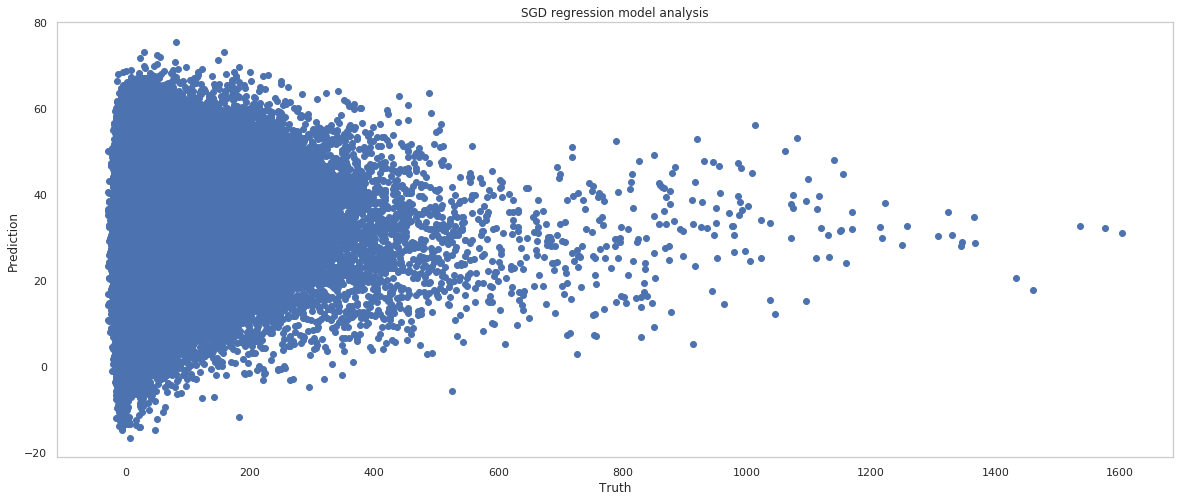

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

y_true, y_pred = y_test, SGD_model.predict(x_test) # Predict on our test set
    
print('Mean Absolute Error:', mean_absolute_error(y_true, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_true, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_true, y_pred)))
print('R2 : ',r2_score(y_true, y_pred))
print()

plt.scatter(y_true, y_pred)
plt.title("SGD regression model analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

####8. Other Regression models tested
 
Below is a summary of other regression models tested on our dataset and its respective results. 

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [0]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)
le = LabelEncoder()
sc1=StandardScaler()

In [0]:
# Creating a copy of our dataset
predict = flights_predict[['distance', 'holiday', 'month', 'day', 'day_of_week','origin_airport', 
                    'destination_airport', 'scheduled_arrival', 'scheduled_departure', 'airline', 'departure_delay']]

In [0]:
# convert object to string
predict['airline'] = predict['airline'].astype(str)
predict['origin_airport'] = predict['origin_airport'].astype(str)
predict['destination_airport'] = predict['destination_airport'].astype(str)
predict['holiday'] = predict['holiday'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
# convert string to integer
predict['airline']= le.fit_transform(predict['airline'])
predict['origin_airport'] = le.fit_transform(predict['origin_airport'])
predict['destination_airport'] = le.fit_transform(predict['destination_airport'])
predict['holiday'] = le.fit_transform(predict['holiday'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
x = predict.drop(['departure_delay'],axis = 1)
x.shape

(2037116, 10)

In [0]:
y = predict[['departure_delay']]
y.shape

(2037116, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [0]:
x_train_sc=sc1.fit_transform(x_train)
x_test_sc=sc1.transform(x_test)

Lasso
Mean Absolute Error: 33.84612003756413
Mean Squared Error: 3085.1835694817373
Root Mean Squared Error: 55.544428788868984
R2 :  0.013915103319995126



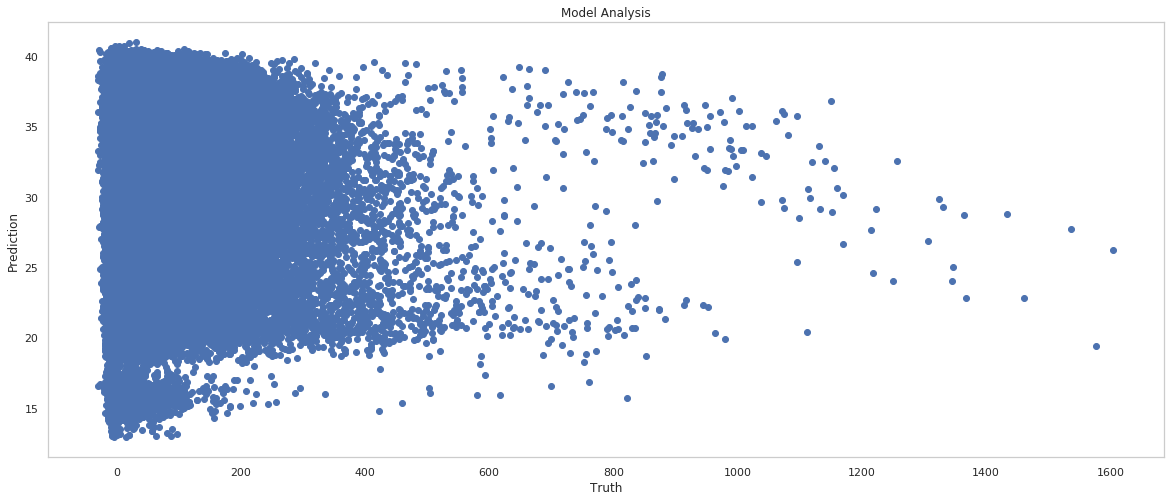


Linear Regression
Mean Absolute Error: 33.721480743267506
Mean Squared Error: 3077.938750548737
Root Mean Squared Error: 55.47917402547317
R2 :  0.016230688881801125



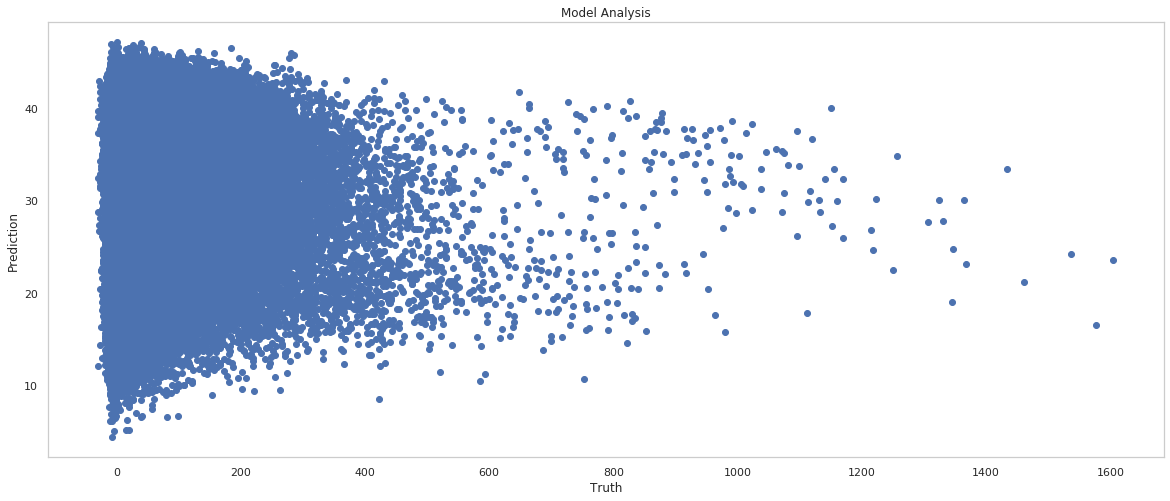


Ridge
Mean Absolute Error: 33.721480914592796
Mean Squared Error: 3077.9387526800992
Root Mean Squared Error: 55.47917404468184
R2 :  0.01623068820057616



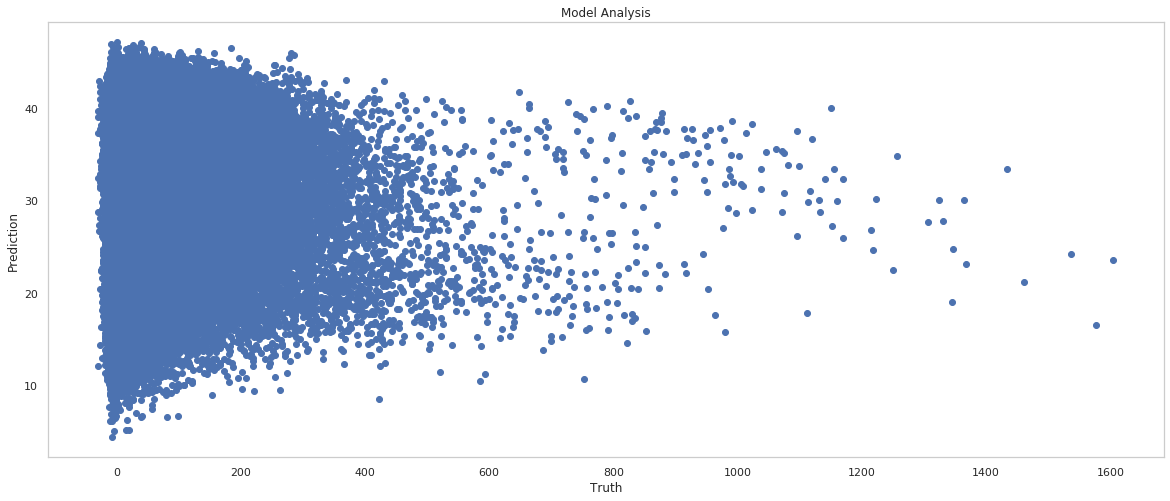


Random forest Regressor
Mean Absolute Error: 42.854239072808674
Mean Squared Error: 6013.949181319706
Root Mean Squared Error: 77.5496562295392
R2 :  -0.9221755605604478



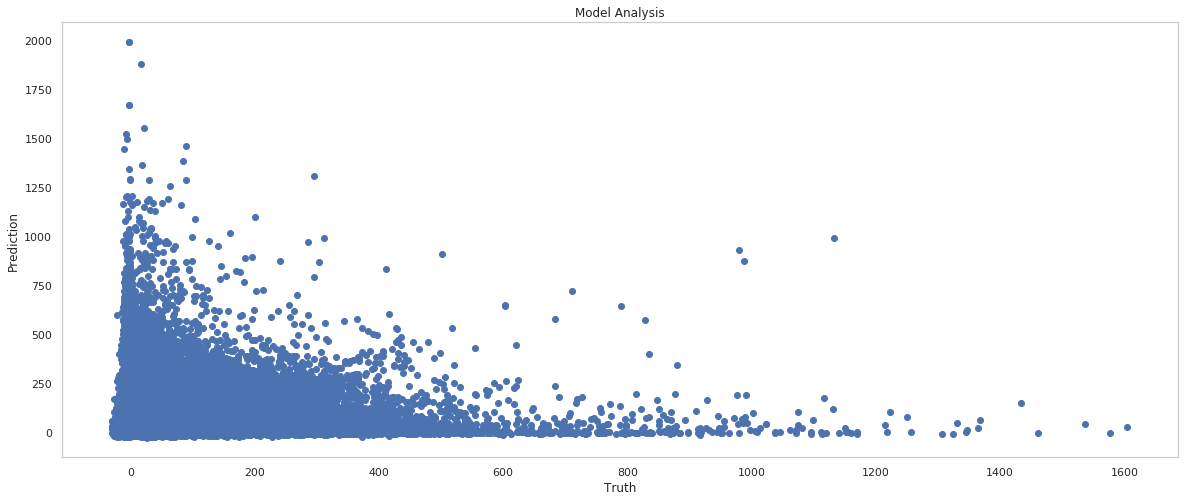

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Decision Tree Regressor
Mean Absolute Error: 34.46694874381478
Mean Squared Error: 3232.029420912618
Root Mean Squared Error: 56.850940369642245
R2 :  -0.033019697470620946



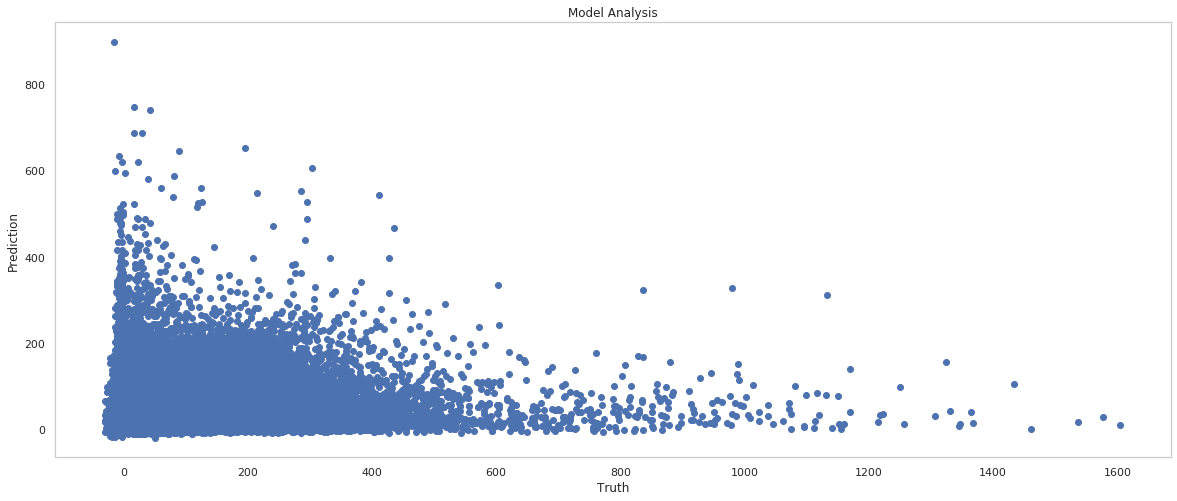

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosted Linear
Mean Absolute Error: 36.965971216448885
Mean Squared Error: 3153.352075742459
Root Mean Squared Error: 56.15471552543436
R2 :  -0.007872882042647467



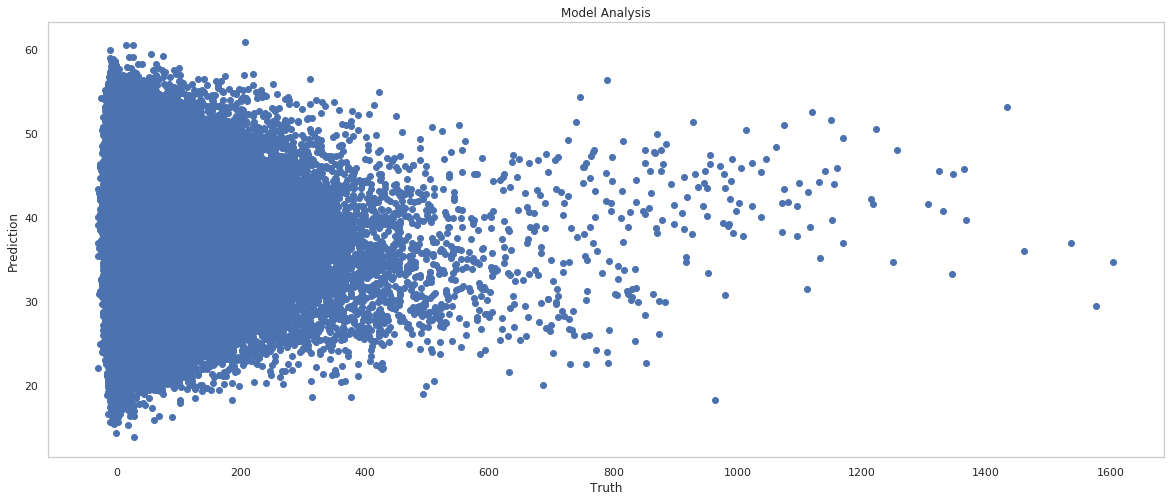

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosted Lasso
Mean Absolute Error: 36.814125829505436
Mean Squared Error: 3151.909863702585
Root Mean Squared Error: 56.14187264157284
R2 :  -0.007411922920345093



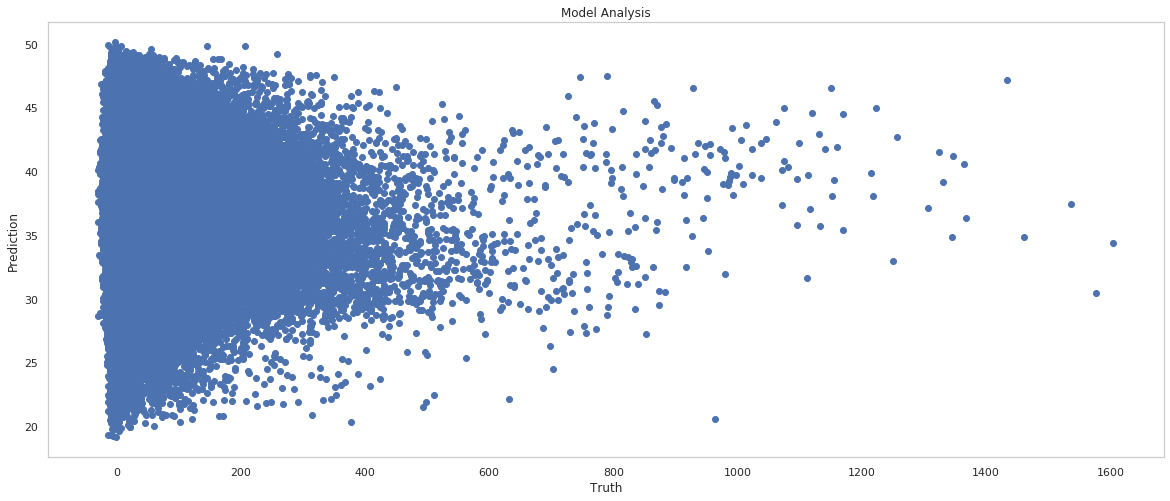

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosted Ridge
Mean Absolute Error: 36.95810424941636
Mean Squared Error: 3152.8624384047444
Root Mean Squared Error: 56.15035563916532
R2 :  -0.007716384390985098



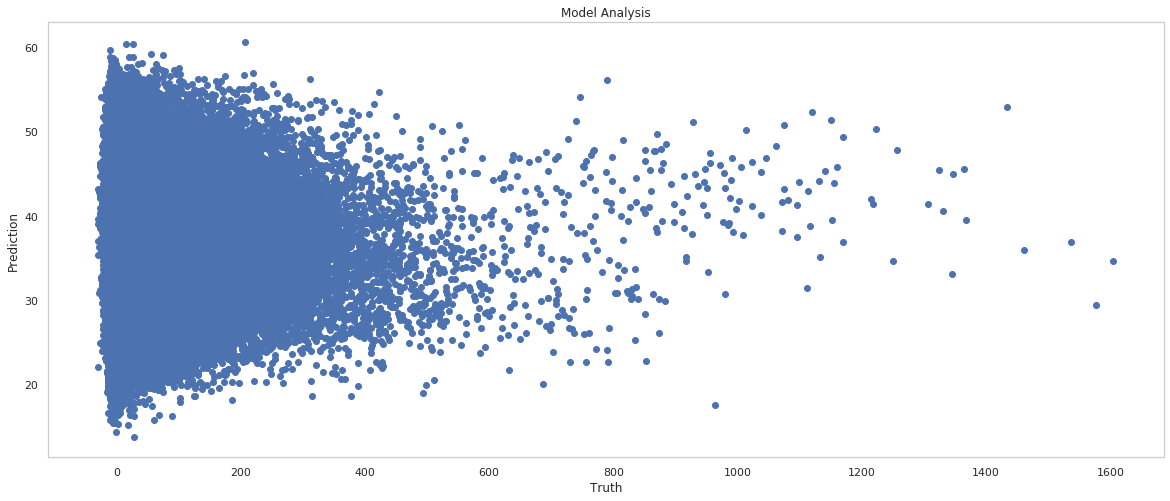

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagged Linear
Mean Absolute Error: 33.71677572765897
Mean Squared Error: 3077.948124806452
Root Mean Squared Error: 55.479258509883245
R2 :  0.016227692686034523



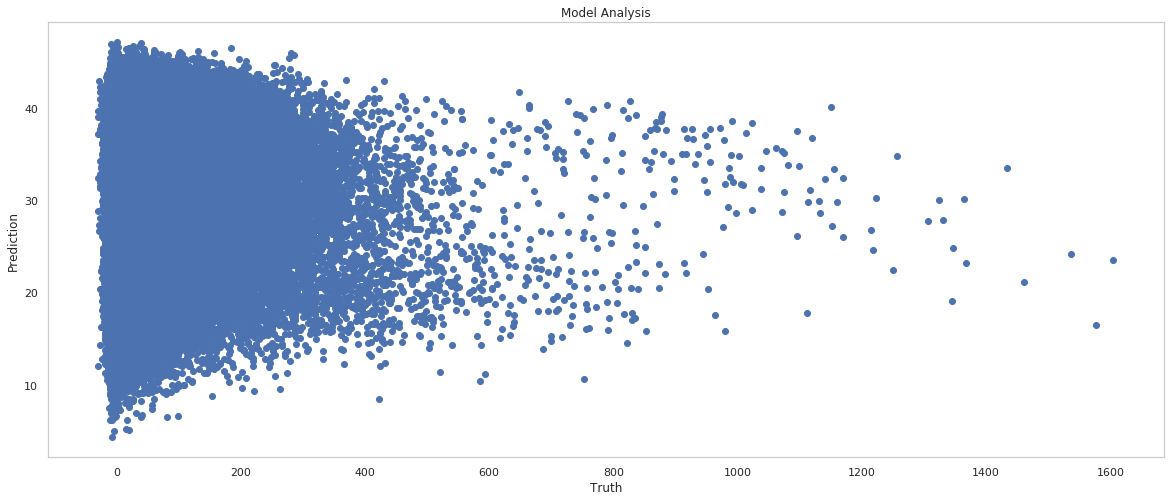

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagged Lasso
Mean Absolute Error: 33.842265629461885
Mean Squared Error: 3085.2363704815407
Root Mean Squared Error: 55.54490409102837
R2 :  0.013898227089695347



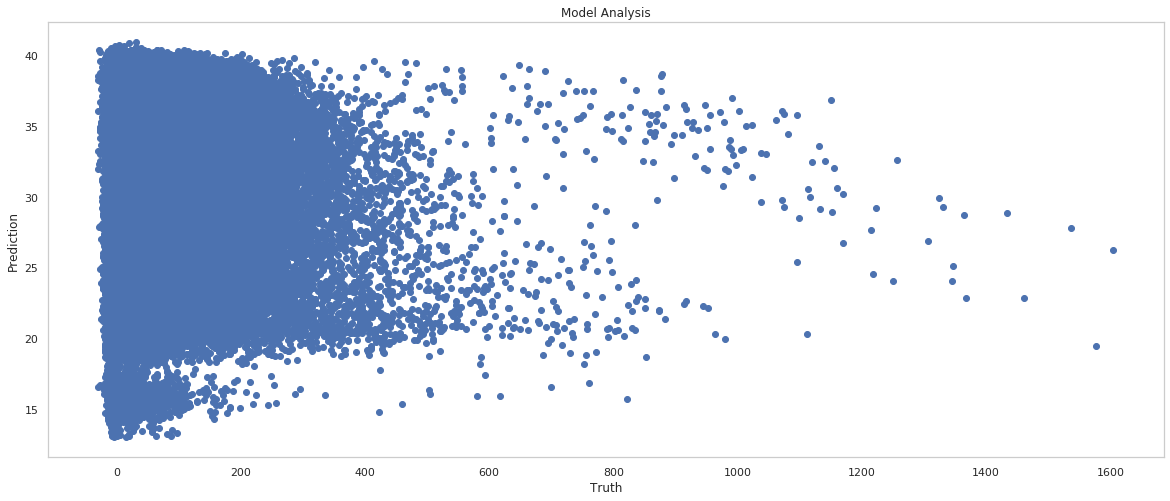

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagged Ridge
Mean Absolute Error: 33.716776792324424
Mean Squared Error: 3077.9481302107924
Root Mean Squared Error: 55.479258558589194
R2 :  0.0162276909587018



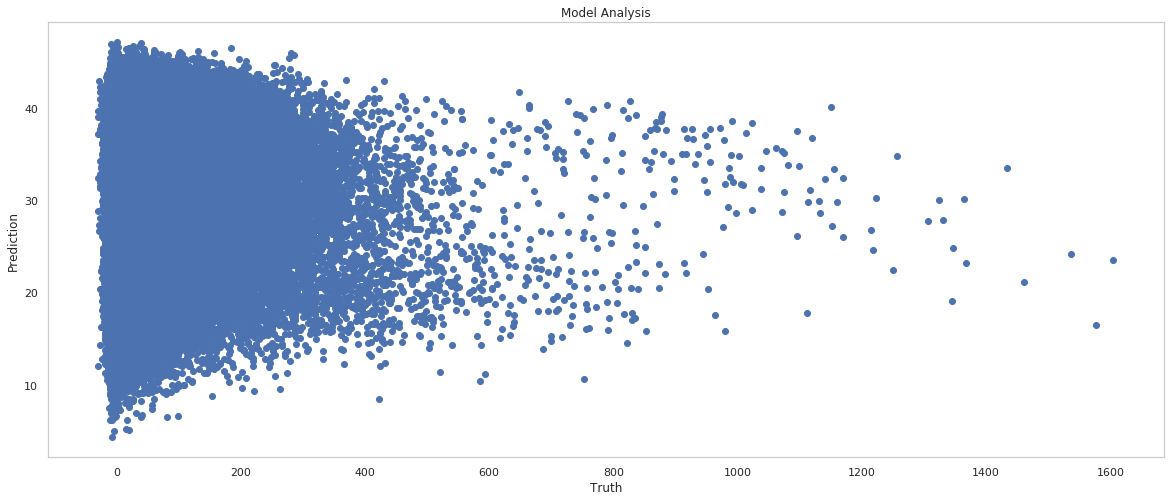

In [0]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(x_train_sc,y_train)
    Y_predict=model1.predict(x_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()
    print()

## Conclusion 

####1. In comparison to all the models used for analysis, a mean absolute error of 33.008 minutes may be the best of the performance we can get using SGD Regressor, given the limitations of our data. 

####2. The error could be improved if we had access to more data from many years or external factors outside of our feature set such as weather.

####3. This model has provided us an estimate of how late our flight could be.

## References

[1] Anish M. Kalliguddi and Aera K. Leboulluec ”Predictive Modeling of Aircraft Flight Delay”, Universal Journal of Management 5(10): 485-491, 2017, DOI: 10.13189/ujm.2017.051003 \
[2] Brett Naul ”Airline Departure Delay Prediction” \
[3] Young Jin Kim, Sun Choi, Simon Briceno, Dimitri Mavris ”A deep learning approach to flight delay prediction”, 35th Digital Avionics Systems Conference (DASC), 2016 \
[4] Sina Khanmohammadi, Salih Tutun, Yunus Kucuk ”A New Multilevel Input Layer Artificial Neural Network for Predicting Flight Delays at JFK Airport”, doi.org/10.1016/j.procs.2016.09.321